In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [3]:
# data = pd.read_csv(r"C:\Users\AI03653\OneDrive - Anthem\Desktop\Anomaly_detection_FWA\New_database\archive\Train_Inpatientdata-1542865627584.csv")

In [4]:
Train = pd.read_csv(r"C:\Users\AI03653\OneDrive - Anthem\Desktop\Anomaly_detection_FWA\New_database\archive\Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv(r"C:\Users\AI03653\OneDrive - Anthem\Desktop\Anomaly_detection_FWA\New_database\archive\Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv(r"C:\Users\AI03653\OneDrive - Anthem\Desktop\Anomaly_detection_FWA\New_database\archive\Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv(r"C:\Users\AI03653\OneDrive - Anthem\Desktop\Anomaly_detection_FWA\New_database\archive\Train_Outpatientdata-1542865627584.csv")

In [5]:
Test = pd.read_csv(r"C:\Users\AI03653\OneDrive - Anthem\Desktop\Anomaly_detection_FWA\New_database\archive\Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv(r"C:\Users\AI03653\OneDrive - Anthem\Desktop\Anomaly_detection_FWA\New_database\archive\Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv(r"C:\Users\AI03653\OneDrive - Anthem\Desktop\Anomaly_detection_FWA\New_database\archive\Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv(r"C:\Users\AI03653\OneDrive - Anthem\Desktop\Anomaly_detection_FWA\New_database\archive\Test_Outpatientdata-1542969243754.csv")

In [6]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

In [7]:
#ANALYZING TRAIN/TEST DATA (CLASS LABELS)

In [8]:
Train.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


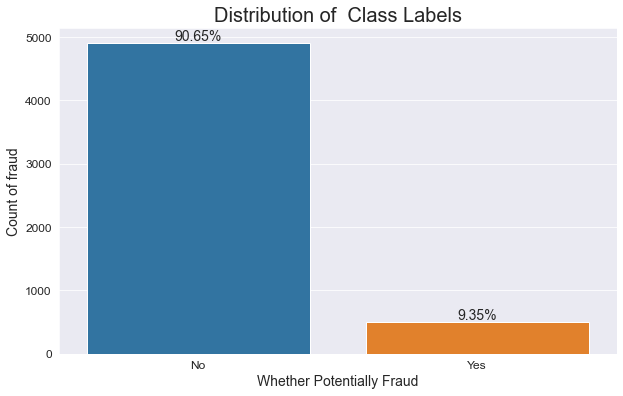

In [9]:
# Check distribution of potential Fraudulent providers
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.countplot(x='PotentialFraud',data=Train)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Distribution of  Class Labels', fontsize=20)
plt.xlabel('Whether Potentially Fraud', size = 14)
plt.ylabel('Count of fraud', size = 14)
percentage_without_hue(ax, Train['PotentialFraud'], 0,40,14)

In [10]:
# This is a highly imbalanced dataset. There are 10% fraudulent providers and 90% non-fraudulent providers

In [11]:
# Now we will analyze the Train_Beneficiary/Test_Beneficiary Data

In [12]:
# display all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [13]:
Train_Beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [14]:
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

Train_Beneficiary = Train_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
Train_Beneficiary = Train_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiary = Test_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiary = Test_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [15]:
# convert all these columns datatypes to numeric
Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)
Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

In [16]:
# calculate patient risk score by summing up all the chronic conditions.
# The higher risk score indicates the health of the patient is not good

Train_Beneficiary['Patient_Risk_Score'] = Train_Beneficiary['ChronicCond_Alzheimer'] + Train_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Train_Beneficiary['ChronicCond_KidneyDisease'] + Train_Beneficiary['ChronicCond_Cancer'] +\
                                        Train_Beneficiary['ChronicCond_ObstrPulmonary'] + Train_Beneficiary['ChronicCond_Depression'] +\
                                    Train_Beneficiary['ChronicCond_Diabetes'] + Train_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Train_Beneficiary['ChronicCond_Osteoporasis'] + Train_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Train_Beneficiary['ChronicCond_stroke'] + Train_Beneficiary['RenalDiseaseIndicator'] 

# calculate patient risk score by summing up all risk scores
Test_Beneficiary['Patient_Risk_Score'] = Test_Beneficiary['ChronicCond_Alzheimer'] + Test_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Test_Beneficiary['ChronicCond_KidneyDisease'] + Test_Beneficiary['ChronicCond_Cancer'] +\
                                        Test_Beneficiary['ChronicCond_ObstrPulmonary'] + Test_Beneficiary['ChronicCond_Depression'] +\
                                    Test_Beneficiary['ChronicCond_Diabetes'] + Test_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Test_Beneficiary['ChronicCond_Osteoporasis'] + Test_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Test_Beneficiary['ChronicCond_stroke'] + Test_Beneficiary['RenalDiseaseIndicator'] 

In [17]:
# Replacing '2' with '0' for Gender Type
Train_Beneficiary = Train_Beneficiary.replace({'Gender': 2}, 0)

Test_Beneficiary = Test_Beneficiary.replace({'Gender': 2}, 0)

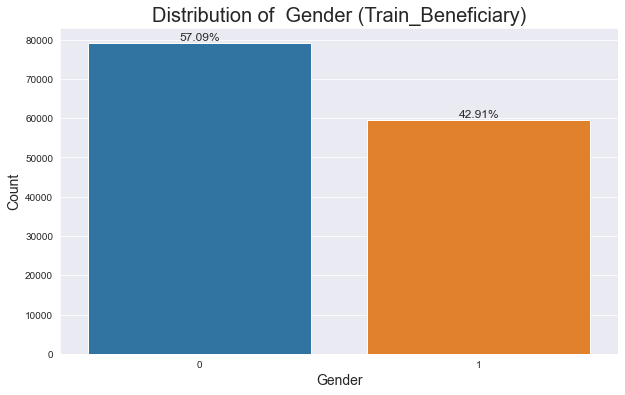

In [18]:
# Plotting the distribution of gender in Beneficiary Data. Plotting counterplot of Gender
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender',data=Train_Beneficiary, order = Train_Beneficiary['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of  Gender (Train_Beneficiary)', fontsize=20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Gender'], 0,800,12)

In [19]:
# Observation - the ratio of gender in beneficiary data is Gender_0 : Gender_1 = 57% : 43%

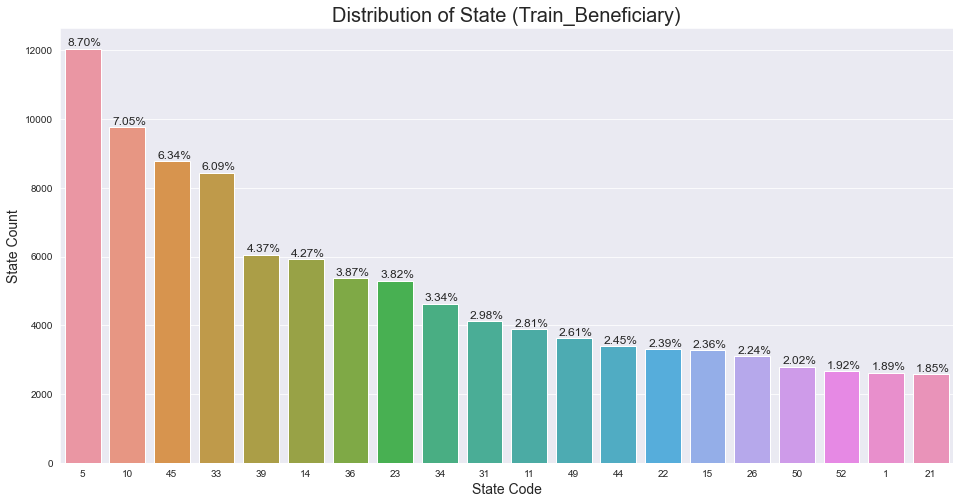

In [20]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='State',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['State'].value_counts().head(20).index)
plt.title('Distribution of State (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('State Code', size = 14)
plt.ylabel('State Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['State'], 0.05, 80,12)

In [21]:
# Observation:
# Top 20 states in terms of beneficiary count are shown in the above pic.
# States with code 5, 10, 45, 33 and 39 are the top 5 states.
# 8.7% of the beneficiaries belongs to state 5

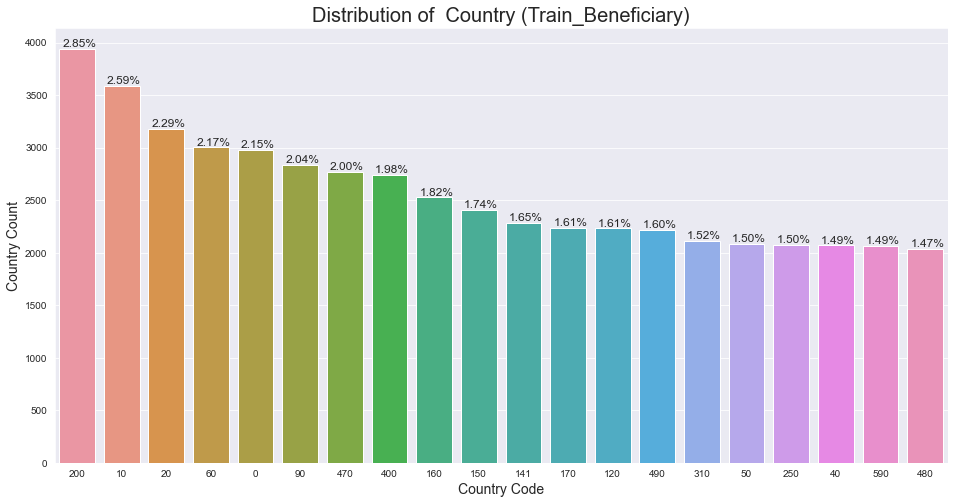

In [22]:
# Plot top 20 Country from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='County',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['County'].value_counts().head(20).index)
plt.title('Distribution of  Country (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Country Code', size = 14)
plt.ylabel('Country Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['County'], 0.05, 20,12)

In [23]:
# Observation:
# Top 20 countries in terms of beneficiary count are shown in the above pic.
# Countries with code 200, 10, 20, 60 and 0 are the top 5 states.
# 2.85% of the beneficiaries belongs to country code 200

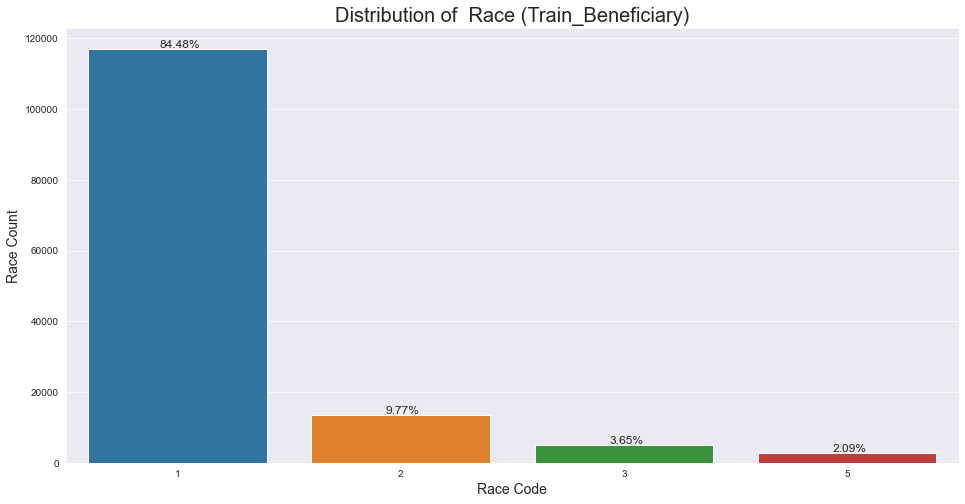

In [24]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Race',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Race'].value_counts().index)
plt.title('Distribution of  Race (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 14)
plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 200,12)

In [25]:
# Observation:
# Race 1 is the most in terms of beneficiary count.
# 85% beneficiaries belongs to race 1.
# There is no race 4 in the dataset.

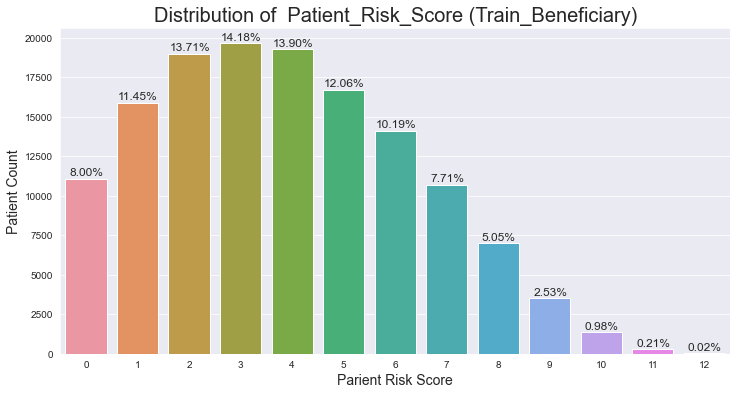

In [26]:
# Distribition of patient risk score
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=Train_Beneficiary, orient ="v")
plt.title('Distribution of  Patient_Risk_Score (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Parient Risk Score', size = 14)
plt.ylabel('Patient Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Patient_Risk_Score'], 0.01, 200,12)

In [27]:
# Observation:
# Most of the patients with risk score 2, 3, 4, 5.
# Very few patients are there with risk score 9, 10, 11, 12

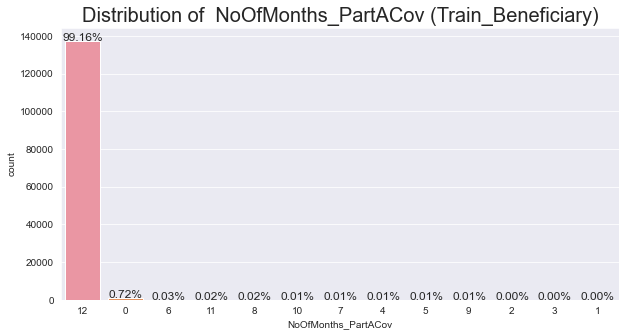

In [28]:
# Plot distribution of NoOfMonths_PartA in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartACov',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['NoOfMonths_PartACov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartACov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 200,12)

In [29]:
# Observation:
# 99% patients covered Part A for 12 month

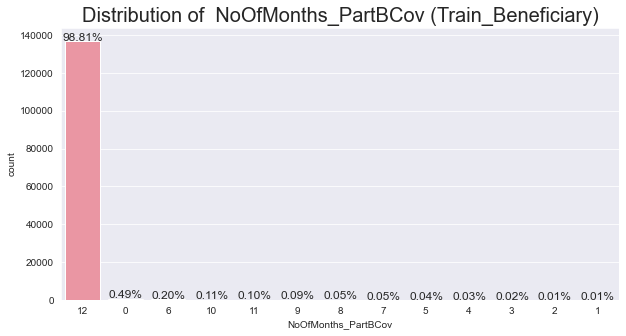

In [30]:
# Plot distribution of NoOFMonths_PartB in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartBCov',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['NoOfMonths_PartBCov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartBCov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 200,12)

In [31]:
# Observation:
# 98% patients covered Part B for 12 months.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


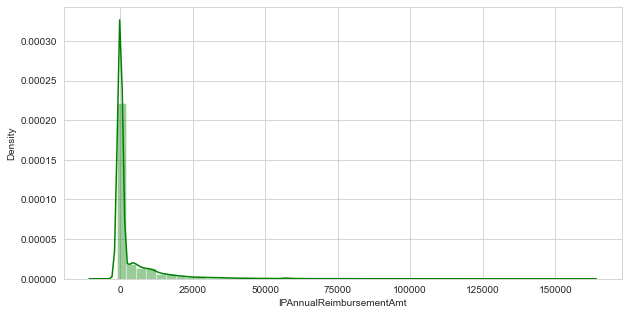

In [32]:
# Plot distribution of IPAnnualReimbursementAmt
# IPAnnualReimbursementAmt is the maximum reimbursement that a perticular inpatient is eligible in that particular year
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(Train_Beneficiary['IPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [33]:
# Calculate total inpatient reimbursement amount for all the beneficiaries
Train_Beneficiary.IPAnnualReimbursementAmt.sum()

507162970

In [34]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")

25 , 0.0 || 50 , 0.0 || 75 , 2280.0 || 100 , 161470.0 || 

In [35]:
for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")

90 , 12000.0 || 91 , 13000.0 || 92 , 14400.0 || 93 , 16000.0 || 94 , 18000.0 || 95 , 20260.0 || 96 , 24000.0 || 97 , 28243.50000000006 || 98 , 35000.0 || 99 , 49000.0 || 

In [36]:
for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")

99.1 , 51110.0 || 99.2 , 54000.0 || 99.3 , 57000.0 || 99.4 , 57100.0 || 99.5 , 59210.0 || 99.6 , 63000.0 || 99.7 , 67333.39999999967 || 99.8 , 74000.0 || 99.9 , 87000.0 || 100 , 161470.0 || 

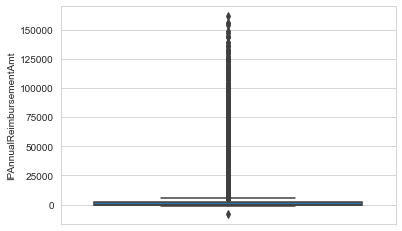

In [37]:
# Plot boxplot for IPAnnualReimbursementAmt
sns.boxplot(y='IPAnnualReimbursementAmt', data=Train_Beneficiary)
plt.show()

In [38]:
# Observation:
# 25th and 50th percentile of annual reimbursement amount is zero.
# 75th and 99th percentile of annual reimbursement amount are 2800 and 49000 respectively.
# There may be some outliers as 100th percentile is 161410.
# Total annual reimbursement amount is 507162970.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


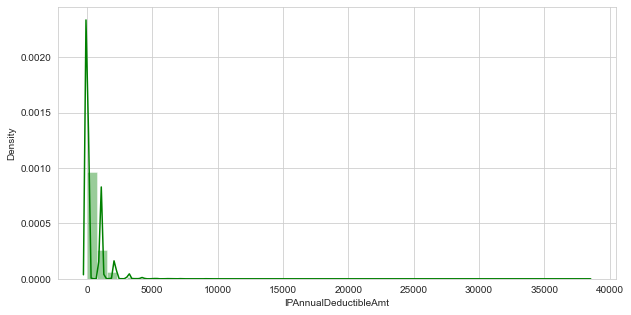

In [39]:
# Plot distribution of IPAnnualDeductibleAmt
# IPAnnuladeductibleAmount - Premium paid by patient annually.
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(Train_Beneficiary['IPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [40]:
# Calculate total inpatient deductible amount for all the beneficiaries
Train_Beneficiary.IPAnnualDeductibleAmt.sum()

55401242

In [41]:
# check the percentiles
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualDeductibleAmt'], p), end=" || ")
    

print('\n'+'='*100)

for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualDeductibleAmt'], p), end=" || ")
    
print('\n'+'='*100)

for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualDeductibleAmt'], p), end=" || ")

25 , 0.0 || 50 , 0.0 || 75 , 1068.0 || 100 , 38272.0 || 
90 , 1068.0 || 91 , 1068.0 || 92 , 1068.0 || 93 , 1068.0 || 94 , 2136.0 || 95 , 2136.0 || 96 , 2136.0 || 97 , 2136.0 || 98 , 2136.0 || 99 , 3204.0 || 
99.1 , 3204.0 || 99.2 , 3204.0 || 99.3 , 4136.0 || 99.4 , 4272.0 || 99.5 , 4272.0 || 99.6 , 4272.0 || 99.7 , 5340.0 || 99.8 , 6272.0 || 99.9 , 9068.0 || 100 , 38272.0 || 

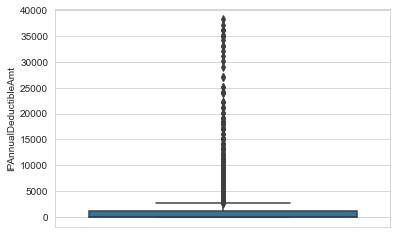

In [42]:
# Plot boxplot of IPAnnualDeductibleAmt
sns.boxplot(y='IPAnnualDeductibleAmt', data=Train_Beneficiary)
plt.show()

In [43]:
# Observation:
# 25th and 50th percentile of annual deductible amount is zero.
# 75th and 99th percentile of annual deductible amount are 1068 and 38272 respectively.
# There may be some outliers as 100th percentile is 38272.
# Total annual deductible amount is 55401242.

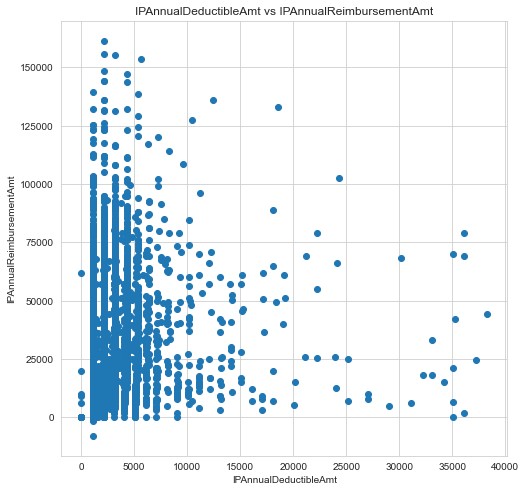

In [44]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(Train_Beneficiary.IPAnnualDeductibleAmt, Train_Beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('IPAnnualReimbursementAmt')
plt.title('IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt')
plt.show()

In [45]:
# IPAnnualDeductibleAmt indicated the amount paid by the beneficiary anually for inpatient claim  
# IPAnnualReimbursementAmt indicates the reimbursement amount the beneficiary is eligible for per annum.



# Observation:
# For some of the patients even though the deductible amount is zero, reimbursement is very high.(they paid less, but got high reimbursements)
# For some of the patients deductible amount is very high but reimbursement amount zero or very low.(they paid large premiums but ahve low reimbursement amounts)
# May be these data are wrong due to wrong entry.

In [46]:
# Similar observations can also be done for outpatient beneficiaries

In [47]:
# Calculate total outpatient reimbursement amount for all the beneficiaries
Train_Beneficiary.OPAnnualReimbursementAmt.sum()

179876080

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


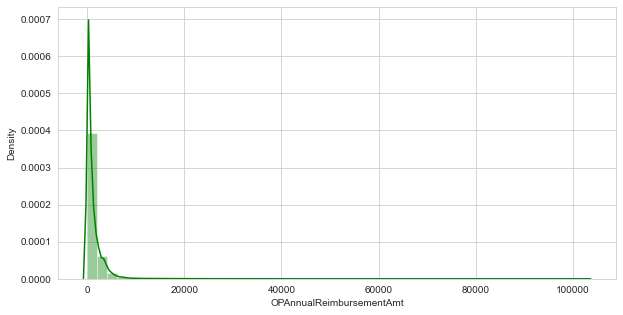

In [48]:
# Plot distribution of OPAnnualReimbursementAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(Train_Beneficiary['OPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [49]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")
    

print('\n'+'='*100)

for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")
    
print('\n'+'='*100)

for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")

25 , 170.0 || 50 , 570.0 || 75 , 1500.0 || 100 , 102960.0 || 
90 , 3230.0 || 91 , 3380.500000000029 || 92 , 3560.0 || 93 , 3780.0 || 94 , 4030.0 || 95 , 4370.0 || 96 , 4850.0 || 97 , 5540.0 || 98 , 6850.0 || 99 , 11514.500000000116 || 
99.1 , 12680.250000000233 || 99.2 , 13840.0 || 99.3 , 14741.149999999907 || 99.4 , 16173.400000000256 || 99.5 , 17666.750000000175 || 99.6 , 19197.79999999999 || 99.7 , 21406.699999999837 || 99.8 , 24230.0 || 99.9 , 28694.45000000007 || 100 , 102960.0 || 

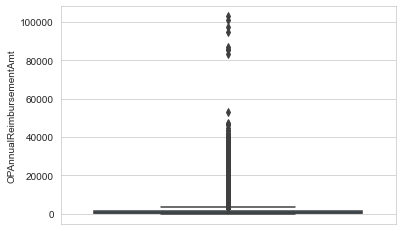

In [50]:
# plot boxplot for OPAnnualReimbursementAmt
sns.boxplot(y='OPAnnualReimbursementAmt', data=Train_Beneficiary)
plt.show()

In [51]:
# Observation:
# 25th and 50th percentile of outpatient annual reimbursement amounts are 170 and 570 respectively.
# 75th and 99th percentile of outpatient annual reimbursement amount are 1500 and 11514 respectively.
# There may be some outliers as 100th percentile is 102960.
# Total outpatient annual reimbursement amount is 179876080.

In [52]:
# Calculate total outpatient deductible amount for all the beneficiaries
Train_Beneficiary.OPAnnualDeductibleAmt.sum()

52335131

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


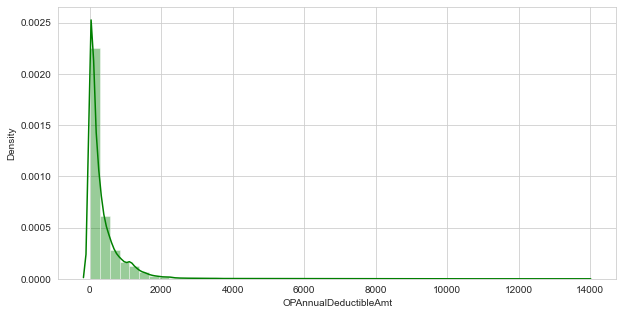

In [53]:
# Plot distribution of OPAnnualDeductibleAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(Train_Beneficiary['OPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [54]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualDeductibleAmt'], p), end=" || ")
    

print('\n'+'='*100)

for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualDeductibleAmt'], p), end=" || ")
    
print('\n'+'='*100)

for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualDeductibleAmt'], p), end=" || ")

25 , 40.0 || 50 , 170.0 || 75 , 460.0 || 100 , 13840.0 || 
90 , 1000.0 || 91 , 1060.0 || 92 , 1120.0 || 93 , 1180.0 || 94 , 1250.0 || 95 , 1340.0 || 96 , 1470.0 || 97 , 1650.0 || 98 , 1999.7999999999884 || 99 , 2960.0 || 
99.1 , 3180.0 || 99.2 , 3435.5999999999767 || 99.3 , 3720.0 || 99.4 , 4100.0 || 99.5 , 4502.250000000058 || 99.6 , 4970.0 || 99.7 , 5440.0 || 99.8 , 6070.0 || 99.9 , 7040.0 || 100 , 13840.0 || 

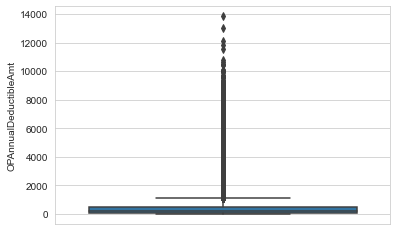

In [55]:
# Plot boxplot for OPAnnualDeductibleAmt
sns.boxplot(y='OPAnnualDeductibleAmt', data=Train_Beneficiary)
plt.show()

In [56]:
# Observation:
# 25th and 50th percentile of annual reimbursement amounts are 40 and 170 respectively.
# 75th and 99th percentile of annual reimbursement amount are 460 and 2960 respectively.
# There may be some outliers as 100th percentile is 13840.
# Total annual reimbursement amount is 52335131.

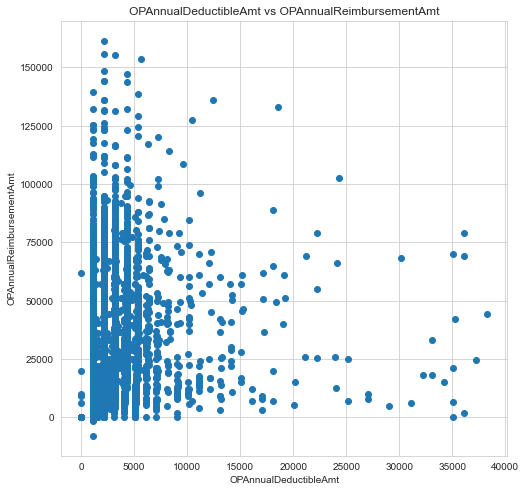

In [57]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(Train_Beneficiary.IPAnnualDeductibleAmt, Train_Beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('OPAnnualReimbursementAmt')
plt.title('OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt')
plt.show()

In [58]:
#Converting DOB and DOD from String to DateTime format

In [59]:
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format = '%Y-%m-%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'],format = '%Y-%m-%d')

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format = '%Y-%m-%d')
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'],format = '%Y-%m-%d')

In [60]:
# Check last date DOD
Train_Beneficiary['DOD'].max()

Timestamp('2009-12-01 00:00:00')

In [61]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the birth month and Birth year for DOB and DOD
Train_Beneficiary['Birth_Year'] = Train_Beneficiary['DOB'].dt.year
Train_Beneficiary['Birth_Month'] = Train_Beneficiary['DOB'].dt.month

Test_Beneficiary['Birth_Year'] = Test_Beneficiary['DOB'].dt.year
Test_Beneficiary['Birth_Month'] = Test_Beneficiary['DOB'].dt.month

In [62]:
# https://stackoverflow.com/questions/46508895/calculating-age-from-date-time-format-in-python-pandas?noredirect=1&lq=1
Train_Beneficiary['Patient_Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365)
Train_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Train_Beneficiary['DOB']).dt.days)/365),inplace=True)

Test_Beneficiary['Patient_Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB']).dt.days)/365)
Test_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Test_Beneficiary['DOB']).dt.days)/365),inplace=True)


# Here we are calculating patient's age based on DOD, if DOD is not available age is calculated based on the maximum date available in the data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


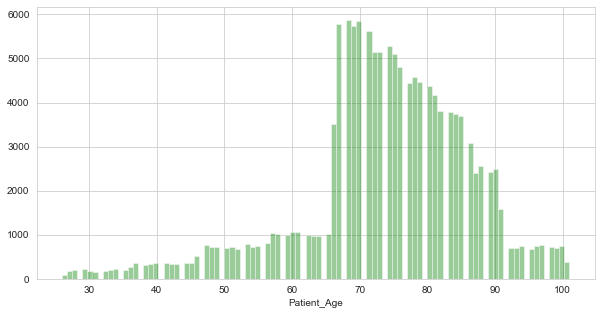

In [63]:
# Plot distribution of age
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(Train_Beneficiary['Patient_Age'], kde = False, color ='green', bins = 100)
plt.show()

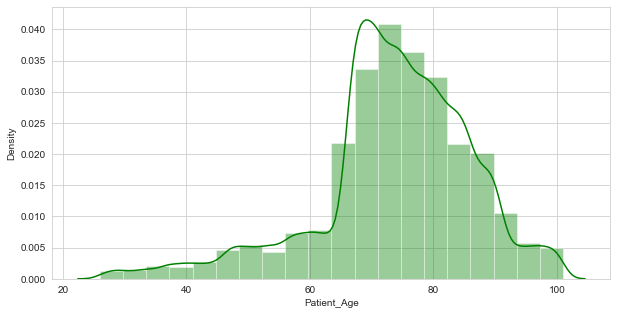

In [64]:
# Plot distribution of age
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(Train_Beneficiary['Patient_Age'], kde = True, color ='green', bins = 20)
plt.show()

In [65]:
# Observation:
# There are very less number of patients in the age group 20-40
# Most of the patients are with age group 60-90
# Number of patients are less in the age group 90-100

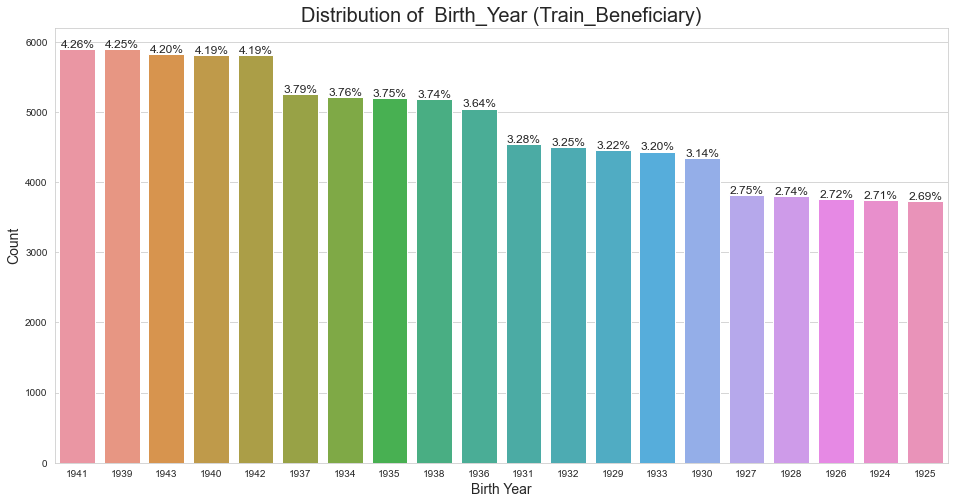

In [66]:
# Plot top 20 years in terms of patient's birth year count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Birth_Year',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Birth_Year'].value_counts().iloc[:20].index)
plt.title('Distribution of  Birth_Year (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Birth Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Birth_Year'], 0.01, 20,12)

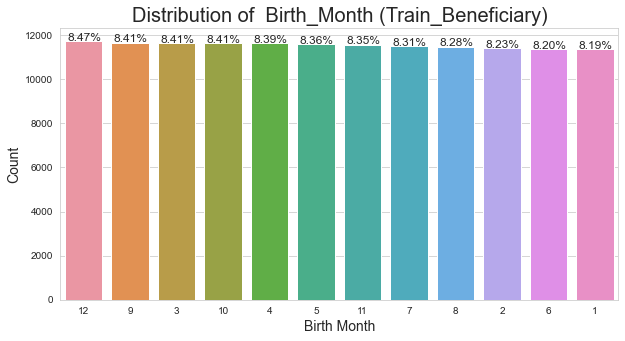

In [67]:
# Plot distribution of birth month of patients
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Birth_Month',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Birth_Month'].value_counts().index)
plt.title('Distribution of  Birth_Month (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Birth Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Birth_Month'], 0.01, 20,12)

In [68]:
# Set value=1 if the patient is dead i.e DOD value is not null
Train_Beneficiary['isDead'] = 0
Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(), 'isDead'] = 1
Test_Beneficiary['isDead'] = 0
Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(), 'isDead'] = 1

In [69]:
# Now we will similarly analyze Train_Inpatient data ##########***************************************************

In [70]:
Train_Inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


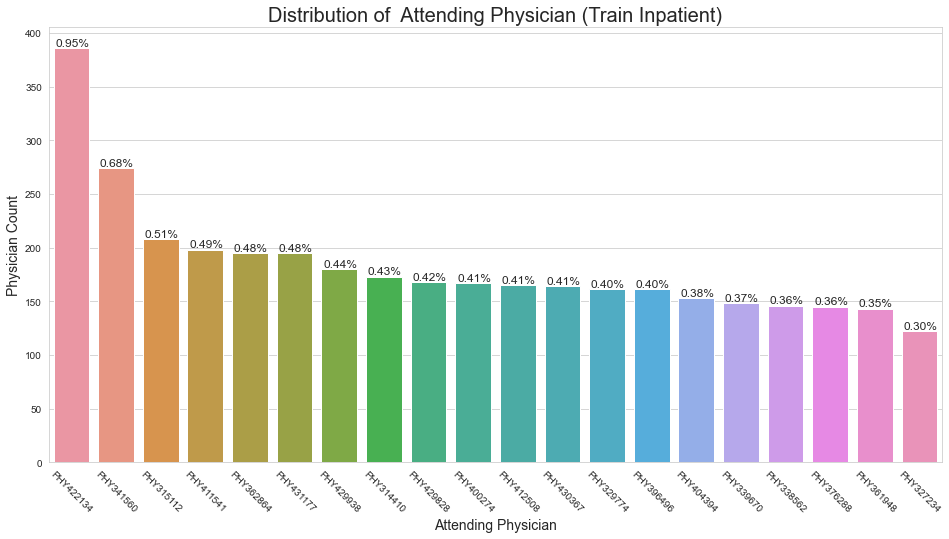

In [71]:
# Plot top 20 Attending Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Inpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['AttendingPhysician'], 0.02, 2, 12)

In [72]:
# Observation:
# PHY422134, PHY341560, PHY315112, PHY411541, PHY431177 are the top 5 attending physicians in terms of number of patients visit.
# PHY422134 treated 1% of the total patients.

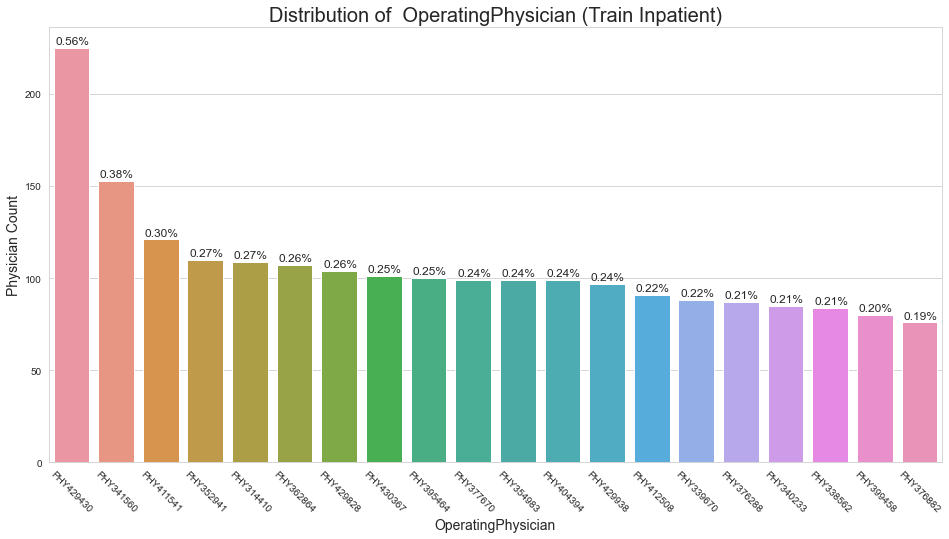

In [73]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Inpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['OperatingPhysician'], 0.02, 2, 12)

In [74]:
# Observation:
# PHY429430, PHY341560, PHY411541, PHY352941, PHY314410 are the top 5 operating physicians in terms of number of patients operation.
# PHY429430 operated 0.56% of the total patients.

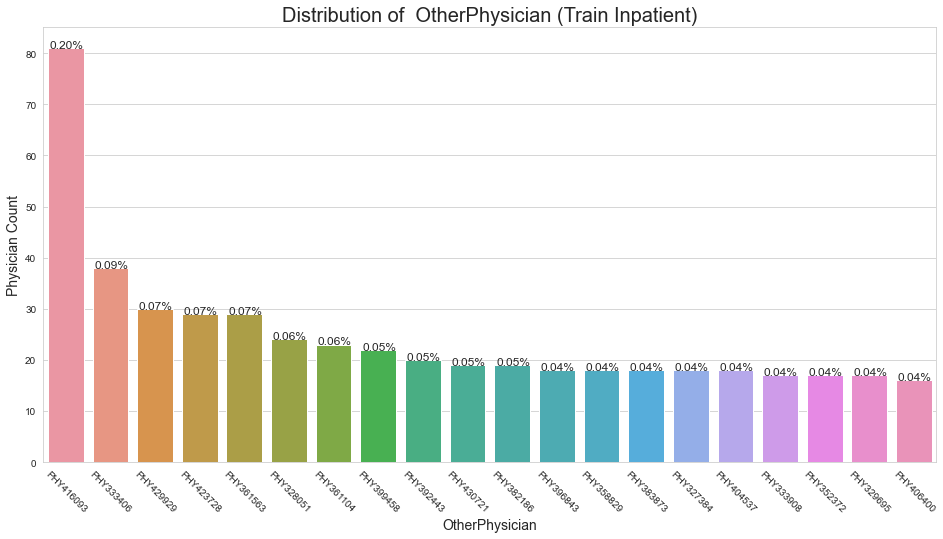

In [75]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OtherPhysician (Train Inpatient)', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['OtherPhysician'], 0.02, 0, 12)

In [76]:
# Observation:
# PHY416093, PHY333406, PHY429929, PHY423728, PHY361563 are the top 5 other physicians in terms of number of patients visit.

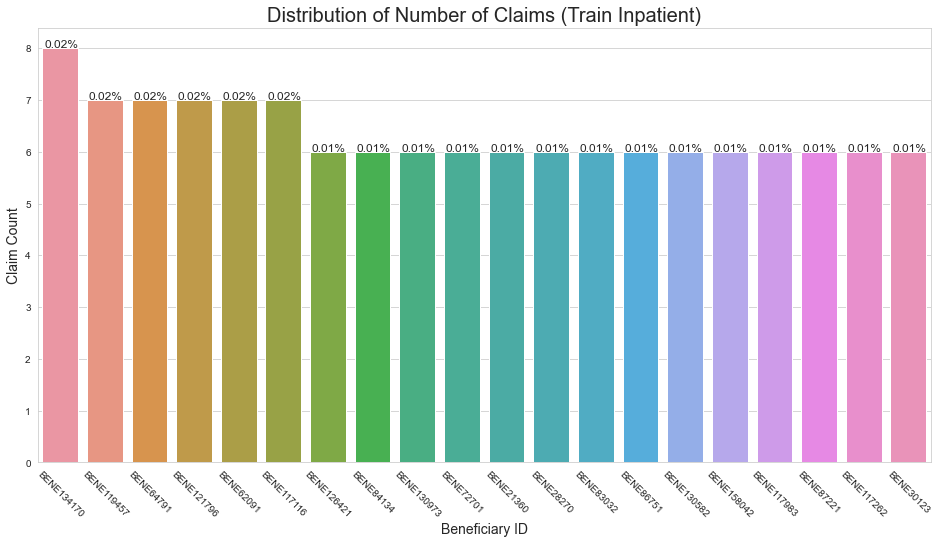

In [77]:
# Distribution of Number of Claims - will give us which beneficiary filed most amount of claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims (Train Inpatient)', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['BeneID'], 0.02, 0.01, 12)

In [78]:
# Observation:
# BENE134170 claimed maximum number of inpatient claims that is 8.
# Another 5 beneficiaries claimed 7 claims, shown in the plot.

In [79]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Inpatient['ClaimStartDt'] = pd.to_datetime(Test_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Inpatient['ClaimEndDt'] = pd.to_datetime(Test_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format = '%Y-%m-%d')

Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format = '%Y-%m-%d')

In [80]:
# Hospitalization_Duration = DischargeDt - AdmissionDt
Train_Inpatient['Hospitalization_Duration'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1
# Claim_Period = ClaimEndDt - ClaimStartDt
Train_Inpatient['Claim_Period'] = ((Train_Inpatient['ClaimEndDt'] - Train_Inpatient['ClaimStartDt']).dt.days)+1

Test_Inpatient['Hospitalization_Duration'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1
Test_Inpatient['Claim_Period'] = ((Test_Inpatient['ClaimEndDt'] - Test_Inpatient['ClaimStartDt']).dt.days)+1

In [81]:
# One possible suspicious behaviour can be is the number of days claimed are more than the number of days patient was hospitalized

In [82]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
Train_Inpatient['ExtraClaimDays'] = np.where(Train_Inpatient['Claim_Period']>Train_Inpatient['Hospitalization_Duration'], Train_Inpatient['Claim_Period'] - Train_Inpatient['Hospitalization_Duration'], 0)
Test_Inpatient['ExtraClaimDays'] = np.where(Test_Inpatient['Claim_Period']>Test_Inpatient['Hospitalization_Duration'], Test_Inpatient['Claim_Period'] - Test_Inpatient['Hospitalization_Duration'], 0)

In [195]:
Train_Inpatient['ClaimStart_Year'] = Train_Inpatient['ClaimStartDt'].dt.year
Train_Inpatient['ClaimStart_Month'] = Train_Inpatient['ClaimStartDt'].dt.month
Test_Inpatient['ClaimStart_Year'] = Test_Inpatient['ClaimStartDt'].dt.year
Test_Inpatient['ClaimStart_Month'] = Test_Inpatient['ClaimStartDt'].dt.month

Train_Inpatient['ClaimEnd_Year'] = Train_Inpatient['ClaimEndDt'].dt.year
Train_Inpatient['ClaimEnd_Month'] = Train_Inpatient['ClaimEndDt'].dt.month
Test_Inpatient['ClaimEnd_Year'] = Test_Inpatient['ClaimEndDt'].dt.year
Test_Inpatient['ClaimEnd_Month'] = Test_Inpatient['ClaimEndDt'].dt.month

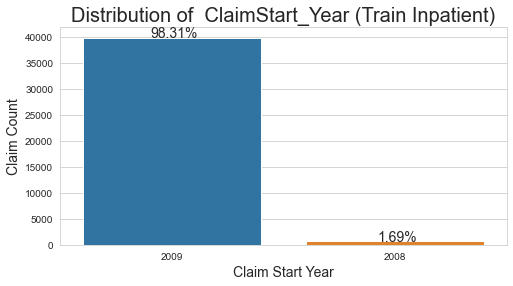

In [84]:
# Plot distribution of claim start year in Train Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, Train_Inpatient['ClaimStart_Year'], 0.01, 20,14)

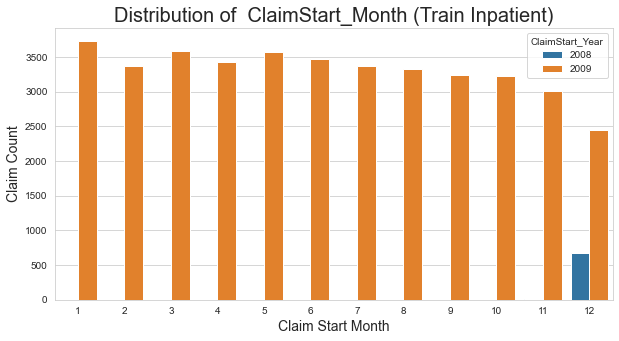

In [85]:
# Plot distribution of ClaimStart_Month in Train Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=Train_Inpatient, orient ="v", hue= 'ClaimStart_Year') #, order = Train_Inpatient['ClaimStart_Month'].value_counts().index
plt.title('Distribution of  ClaimStart_Month (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.show()

In [86]:
# Observation:
# Claims are almost equally distributed accross all the months for the year 2009.
# Claims are observed only in December for the year 2008. That means the data collected from Dec2008 to Dec2009.

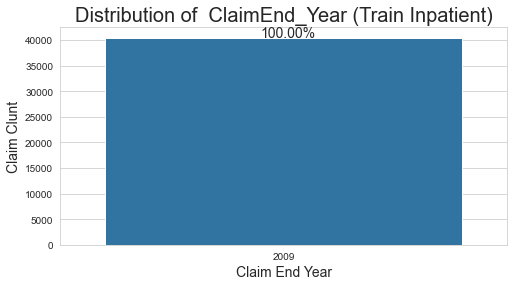

In [87]:
# Plot distribution of ClaimEnd_Year in Train_Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimEnd_Year',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['ClaimEnd_Year'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Year', size = 14)
plt.ylabel('Claim Clunt', size = 14)
percentage_without_hue(ax, Train_Inpatient['ClaimEnd_Year'], 0.01, 20,14)

In [88]:
# all the claims ended in 2009

In [89]:
# Get the month and year of Admission_Year and Admission_Month
Train_Inpatient['Admission_Year'] = Train_Inpatient['AdmissionDt'].dt.year
Train_Inpatient['Admission_Month'] = Train_Inpatient['AdmissionDt'].dt.month
Test_Inpatient['Admission_Year'] = Test_Inpatient['AdmissionDt'].dt.year
Test_Inpatient['Admission_Month'] = Test_Inpatient['AdmissionDt'].dt.month

Train_Inpatient['Discharge_Year'] = Train_Inpatient['DischargeDt'].dt.year
Train_Inpatient['Discharge_Month'] = Train_Inpatient['DischargeDt'].dt.month
Test_Inpatient['Discharge_Year'] = Test_Inpatient['DischargeDt'].dt.year
Test_Inpatient['Discharge_Month'] = Test_Inpatient['DischargeDt'].dt.month

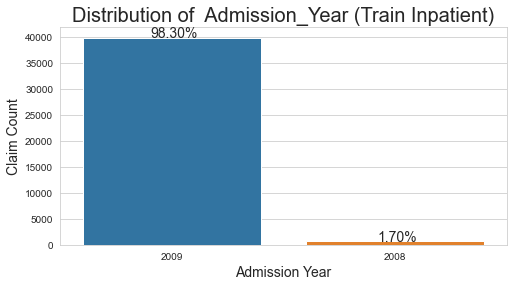

In [90]:
# Plot distribution of Admission_Year in Train_Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Admission_Year',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['Admission_Year'].value_counts().index)
plt.title('Distribution of  Admission_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Admission Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, Train_Inpatient['Admission_Year'], 0.01, 20,14)

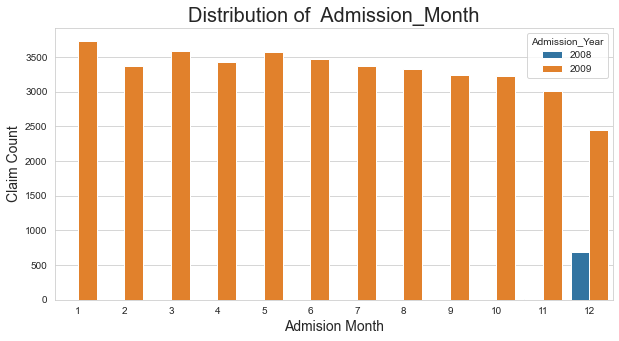

In [91]:
# Plot distribution of Admission_Month in Train_Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Admission_Month',y=None, data=Train_Inpatient, orient ="v", hue='Admission_Year') #, order = Train_Inpatient['Admission_Month'].value_counts().index
plt.title('Distribution of  Admission_Month', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Admision Month', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.show()

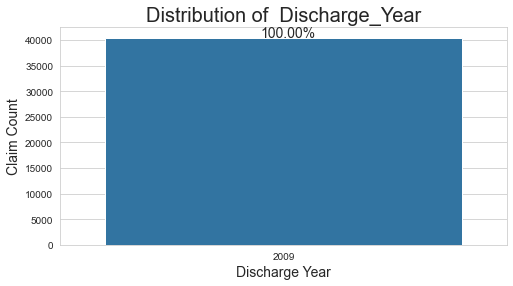

In [92]:
# Plot distribution of discharge_year in Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Discharge_Year',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['Discharge_Year'].value_counts().index)
plt.title('Distribution of  Discharge_Year', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Discharge Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, Train_Inpatient['Discharge_Year'], 0.01, 20,14)

In [93]:
# Observation:
# 98.3% patients got admitted in the year 2009 and only 1.7% in 2008
# In 2008 patients were admitted only in December in the dataset.

In [94]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([Train_Inpatient["ClmProcedureCode_1"], 
                                   Train_Inpatient["ClmProcedureCode_2"],
                                   Train_Inpatient["ClmProcedureCode_3"],
                                   Train_Inpatient["ClmProcedureCode_4"], 
                                   Train_Inpatient["ClmProcedureCode_5"], 
                                   Train_Inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

# we are making a seperate dataframe that will contain sorted cocatenated ProcedureCodes of all the claims.

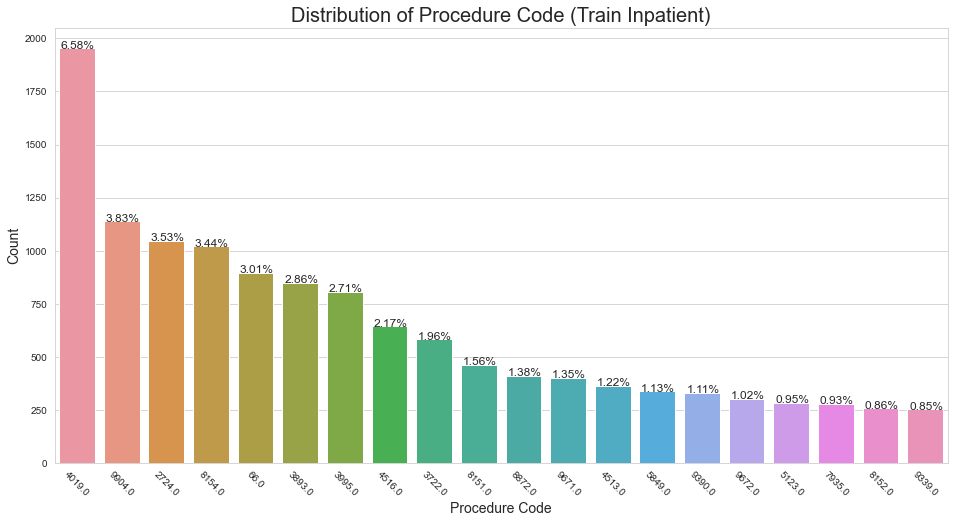

In [95]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP_df, orient ="v", order = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Inpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_IP_df['ProcedureCode'], 0.02, 0.01, 12)

In [96]:
# Observation:
# 4019, 9904, 2714, 8154, 66 are the top 5 procedures in terms of number of procedures.
# 4019 test is done 6.5% of the total procedures.

In [97]:
ClmProcedureCode_IP_df['ProcedureCode'].value_counts()

4019.0    1953
9904.0    1137
2724.0    1047
8154.0    1021
66.0       894
          ... 
4461.0       1
3616.0       1
4533.0       1
740.0        1
4676.0       1
Name: ProcedureCode, Length: 1321, dtype: int64

In [98]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Train_Inpatient["ClmDiagnosisCode_1"], 
                                           Train_Inpatient["ClmDiagnosisCode_2"], 
                                           Train_Inpatient["ClmDiagnosisCode_3"], 
                                           Train_Inpatient["ClmDiagnosisCode_4"],
                                           Train_Inpatient["ClmDiagnosisCode_5"], 
                                           Train_Inpatient["ClmDiagnosisCode_6"],
                                           Train_Inpatient["ClmDiagnosisCode_7"],
                                           Train_Inpatient["ClmDiagnosisCode_8"],
                                           Train_Inpatient["ClmDiagnosisCode_9"],
                                           Train_Inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

#Similar to claims procedure code we are also storing Claims Diagnosis code in a seperate dataframe.

In [99]:
ClmDiagnosisCode_IP_df['DiagnosisCode'][0]

0     1970
0     4019
0     5853
0     7843
0     2768
0    71590
0     2724
0    19889
0     5849
Name: DiagnosisCode, dtype: object

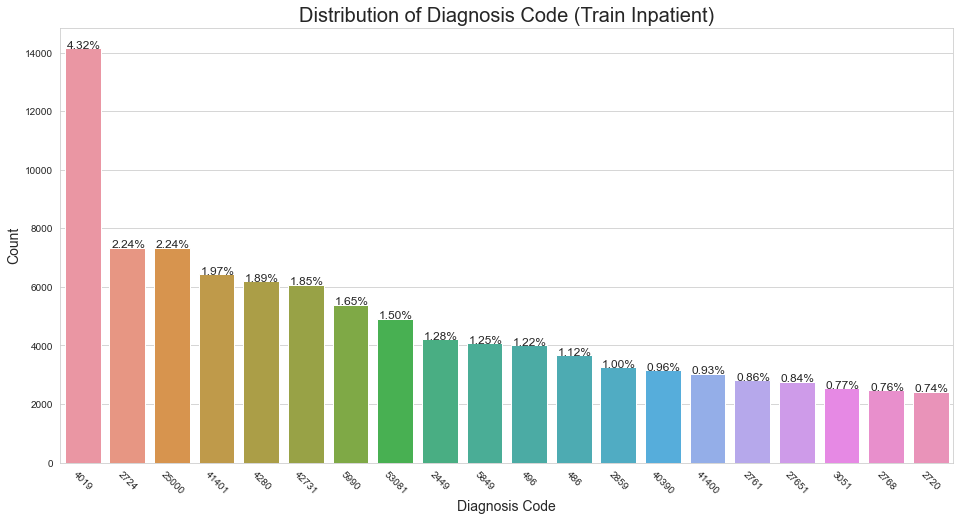

In [100]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_IP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Inpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_IP_df['DiagnosisCode'], 0.02, 0.01, 12)


In [101]:
# Observation:
# 4019, 2724, 25000, 41401, 4280 are the top 5 diagnosis in terms of number of diagnosos done.
# 4019 test is done 4.3% of the total diagnosis.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


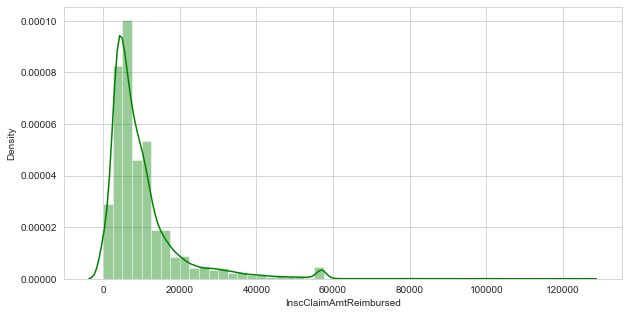

In [102]:
# Plot the distribution for InscClaimAmtReimbursed
# There is no null value in this column
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(Train_Inpatient['InscClaimAmtReimbursed'], kde = True, color ='green', bins = 50)
plt.show()

In [103]:
# Calculate total InscClaimAmtReimbursed for inpatient
Train_Inpatient['DeductibleAmtPaid'].notna().sum()

39575

In [104]:
Train_Inpatient['DeductibleAmtPaid'].value_counts()
# so there are 899 claims in which entry given is NA and for all other claims value is 1068.0

1068.0    39575
Name: DeductibleAmtPaid, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


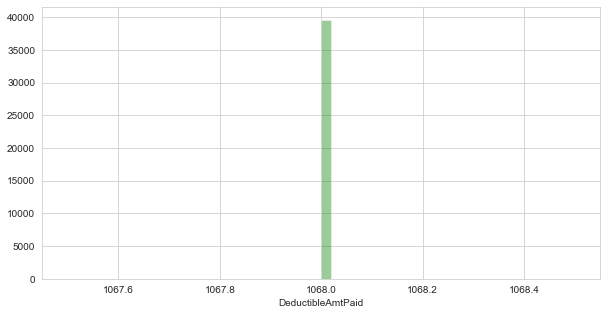

In [105]:
# Plot the distribution for DeductibleAmtPaid
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(Train_Inpatient['DeductibleAmtPaid'].dropna(), kde = False, color ='green', bins = 50)
plt.show()

In [106]:
# Observation:
# Total InscClaimAmtReimbursed for inpatient is 40474
# For very few claims InscClaimAmtReimbursed are very high.
# DeductibleAmtPaid value is either 0 or 1068

In [107]:
Train_Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month'],
      dtype='object')

In [108]:
#Now as we have analyzed Inpatient data above, we wil similarly analyze outpatient data

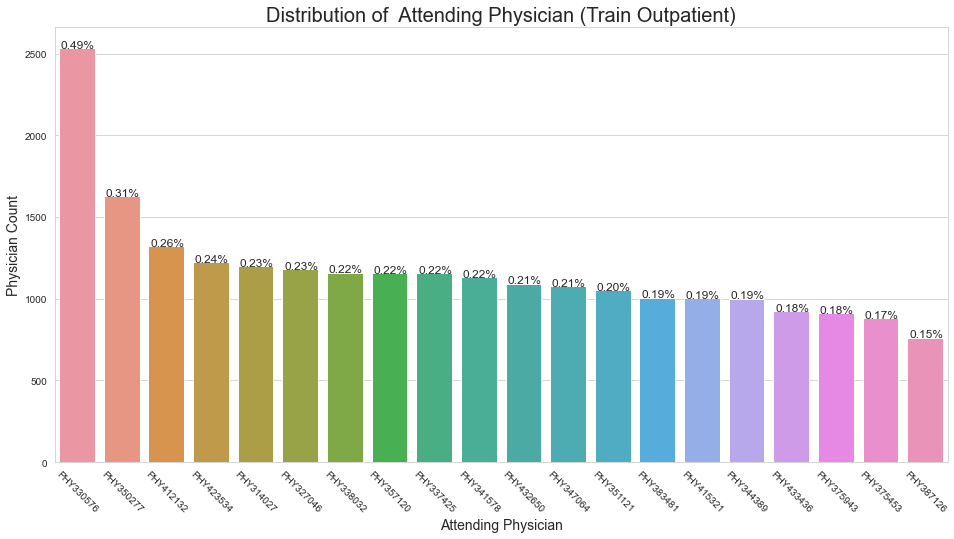

In [109]:
# Top 20 attending physician in terms of patient count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Outpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['AttendingPhysician'], 0.02, 2, 12)


In [110]:
# Observation:
# PHY330576, PHY350277, PHY412132, PHY423534, PHY314027 are the top 5 attending physicians in terms of number of patients visit.
# PHY330576 treated 0.5% of the total patients.

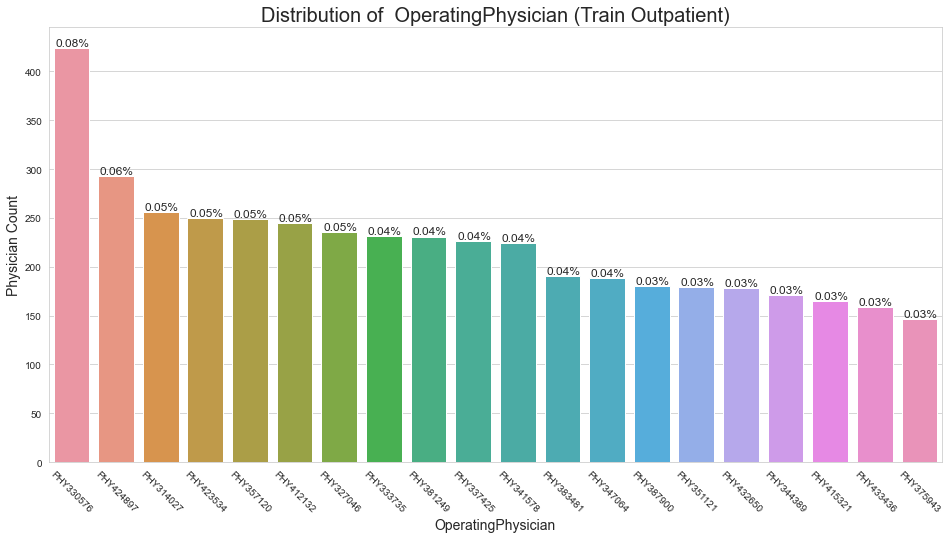

In [111]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['OperatingPhysician'], 0.02, 2, 12)

In [112]:
# Observation:
# PHY330576, PHY424897, PHY314027, PHY423534, PHY357120 are the top 5 operating physicians in terms of number of patients operation.
# PHY330576 operated 0.08% of the total patients.

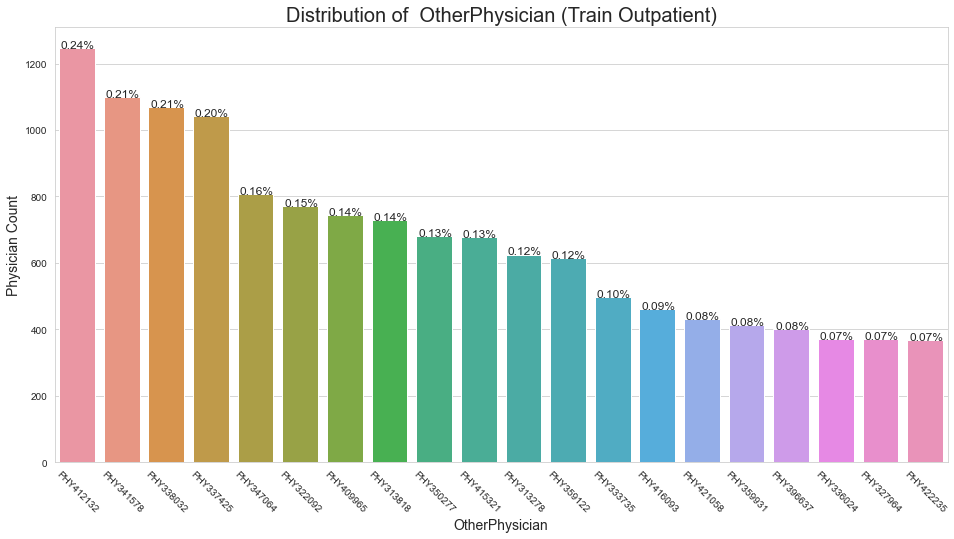

In [113]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OtherPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['OtherPhysician'], 0.02, 0, 12)

In [114]:
#Observation:
# PHY412132, PHY341578, PHY338032, PHY337425, PHY347064 are the top 5 other physicians in terms of number of patients visit.

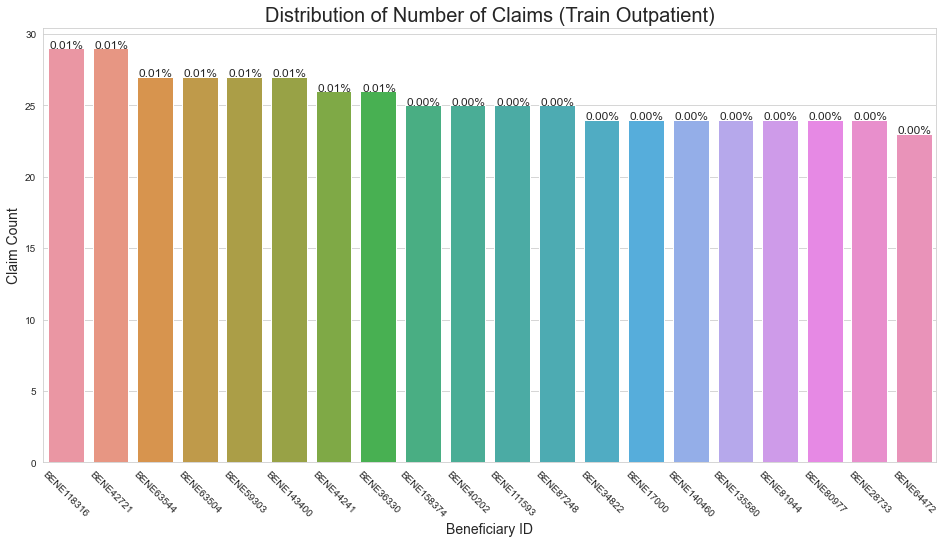

In [115]:
# Distribution of Number of Claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims (Train Outpatient)', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['BeneID'], 0.02, 0.01, 12)

In [116]:
# Observation:
# BENE118316 and BENE42721 claimed maximum number of inpatient claims that is 29.
# Another 4 beneficiaries claimed 26 claims, shown in the plot.

In [117]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Outpatient['ClaimStartDt'] = pd.to_datetime(Test_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Outpatient['ClaimEndDt'] = pd.to_datetime(Test_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

In [118]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
Train_Outpatient['ClaimStart_Year'] = Train_Outpatient['ClaimStartDt'].dt.year
Train_Outpatient['ClaimStart_Month'] = Train_Outpatient['ClaimStartDt'].dt.month
Test_Outpatient['ClaimStart_Year'] = Test_Outpatient['ClaimStartDt'].dt.year
Test_Outpatient['ClaimStart_Month'] = Test_Outpatient['ClaimStartDt'].dt.month

Train_Outpatient['ClaimEnd_Year'] = Train_Outpatient['ClaimEndDt'].dt.year
Train_Outpatient['ClaimEnd_Month'] = Train_Outpatient['ClaimEndDt'].dt.month
Test_Outpatient['ClaimEnd_Year'] = Test_Outpatient['ClaimEndDt'].dt.year
Test_Outpatient['ClaimEnd_Month'] = Test_Outpatient['ClaimEndDt'].dt.month

In [119]:
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Outpatient['Claim_Period'] = ((Train_Outpatient['ClaimEndDt'] - Train_Outpatient['ClaimStartDt']).dt.days)+1

Test_Outpatient['Claim_Period'] = ((Test_Outpatient['ClaimEndDt'] - Test_Outpatient['ClaimStartDt']).dt.days)+1

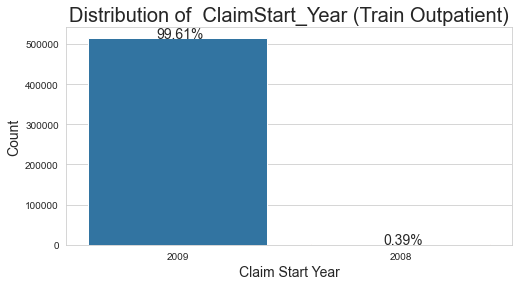

In [120]:
# Plot distribution of claim start year in Train Outpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimStart_Year'], 0.01, 20,14)

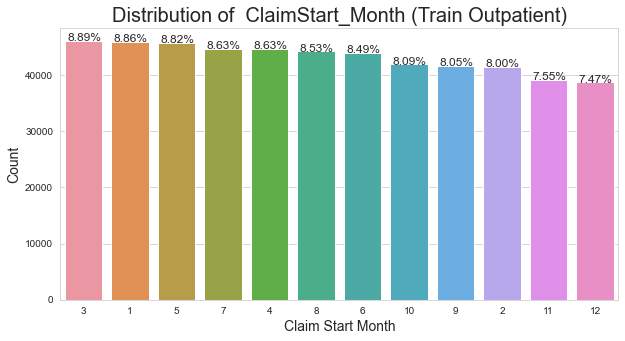

In [121]:
# Plot distribution of ClaimStart_Month in Train Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimStart_Month'].value_counts().index)
plt.title('Distribution of  ClaimStart_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimStart_Month'], 0.01, 20,12)

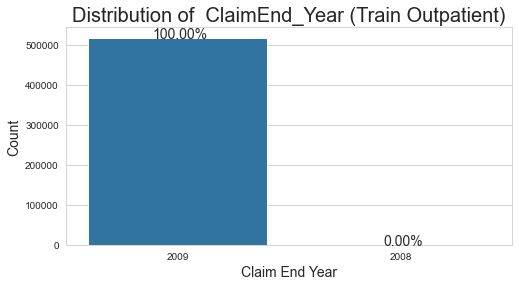

In [122]:
# Plot distribution of ClaimEnd_Year in Train_Outpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimEnd_Year',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimEnd_Year'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimEnd_Year'], 0.01, 20,14)

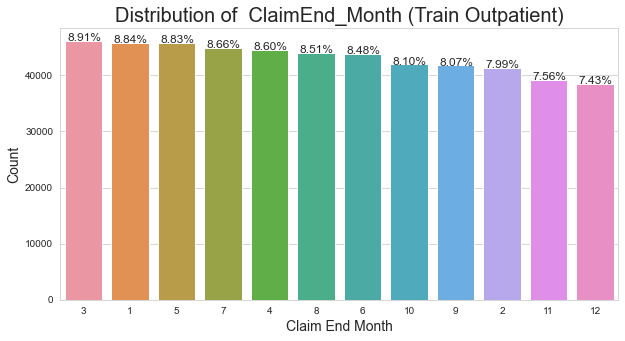

In [123]:
# Plot distribution of ClaimEnd_Month in Train_Outpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimEnd_Month'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimEnd_Month'], 0.01, 20,12)

In [124]:
# Observation:
# 99.6% claims started in 2009 only 0.4% claim started in 2008
# Distribution of claim start year is uniform.
# All the claims ended in 2009, distributed accross all the months

In [125]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([Train_Outpatient["ClmProcedureCode_1"], 
                                   Train_Outpatient["ClmProcedureCode_2"],
                                   Train_Outpatient["ClmProcedureCode_3"],
                                   Train_Outpatient["ClmProcedureCode_4"], 
                                   Train_Outpatient["ClmProcedureCode_5"], 
                                   Train_Outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
#Similar to Inpatient data we are now making a new dataframe for Outpatient data to tackle the Procedure codes.

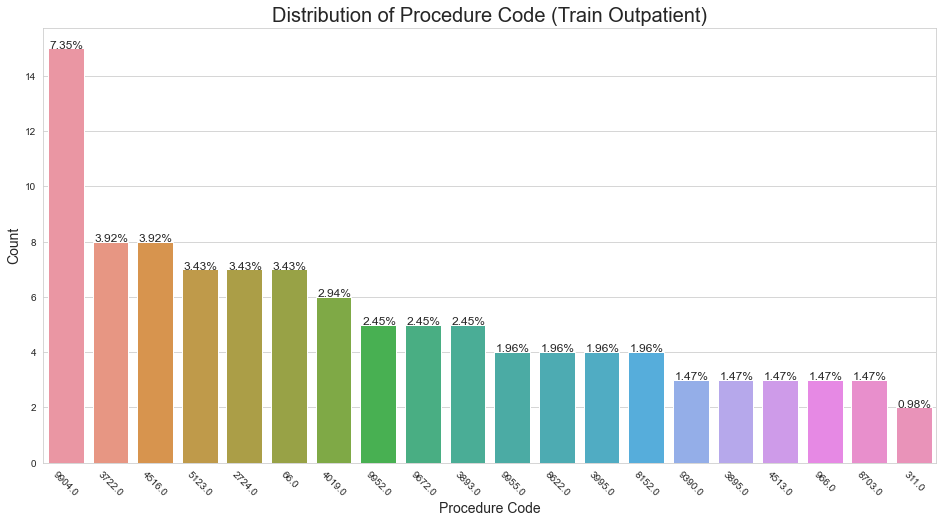

In [126]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP_df, orient ="v", order = ClmProcedureCode_OP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Outpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_OP_df['ProcedureCode'], 0.02, 0.01, 12)

In [127]:
# Observation:
# Top 20 ProcedureCodes are shown in the plot.
# Procedure 9904 was done 7.35% of total procedures done.

In [128]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([Train_Outpatient["ClmDiagnosisCode_1"], 
                                           Train_Outpatient["ClmDiagnosisCode_2"], 
                                           Train_Outpatient["ClmDiagnosisCode_3"], 
                                           Train_Outpatient["ClmDiagnosisCode_4"],
                                           Train_Outpatient["ClmDiagnosisCode_5"], 
                                           Train_Outpatient["ClmDiagnosisCode_6"],
                                           Train_Outpatient["ClmDiagnosisCode_7"],
                                           Train_Outpatient["ClmDiagnosisCode_8"],
                                           Train_Outpatient["ClmDiagnosisCode_9"],
                                           Train_Outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

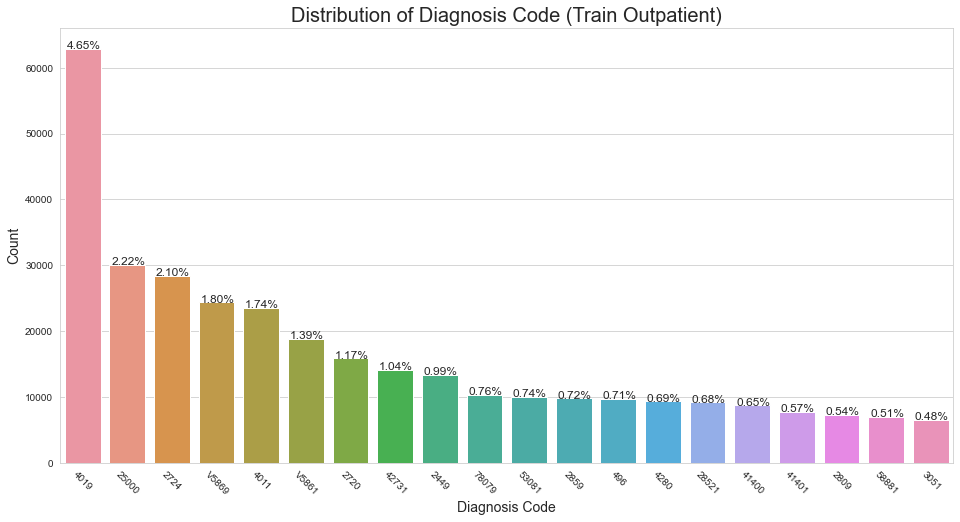

In [129]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_OP_df, orient ="v", order = ClmDiagnosisCode_OP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Outpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_OP_df['DiagnosisCode'], 0.02, 0.01, 12)

In [130]:
# Observation:
# Top 20 DiagnosisCodes are shown in the plot.
# Procedure 4019 was done 4.65% of total procedures done.


In [131]:
Train_Outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period'],
      dtype='object')

In [132]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
Train_Inpatient['Inpatient_or_Outpatient'] = 1
Train_Outpatient['Inpatient_or_Outpatient'] = 0
Test_Inpatient['Inpatient_or_Outpatient'] = 1
Test_Outpatient['Inpatient_or_Outpatient'] = 0

# all the inpatients are 1 and all outpatients are 0

In [133]:
#NOW WE ARE GOING TO MERGE BOTH INPATIENT AND OUTPATIENT DATAFRAMES

In [134]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in Train_Outpatient.columns if idx in Train_Inpatient.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(Train_Inpatient, Train_Outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period', 'Inpatient_or_Outpatient']


In [135]:
# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, Train_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge provider details
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, Train , how = 'inner', on = 'Provider' )

In [136]:
# Merge inpatient and outpatient dataframes based on common columns

common_columns_test = [ idx for idx in Test_Outpatient.columns if idx in Test_Inpatient.columns]
Inpatient_Outpatient_Merge_Te = pd.merge(Test_Inpatient, Test_Outpatient, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, Test_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, Test , how = 'inner', on = 'Provider' )

In [137]:
Final_Dataset_Train.shape

(558211, 72)

In [138]:
Final_Dataset_Train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month,Inpatient_or_Outpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Birth_Year,Birth_Month,Patient_Age,isDead,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7,0.0,2009,4,2009,4,2009.0,4.0,2009.0,4.0,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7,1943,1,67.0,0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2009,9,2009,9,NaN,NaN,NaN,NaN,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,4,1932,5,78.0,0,Yes


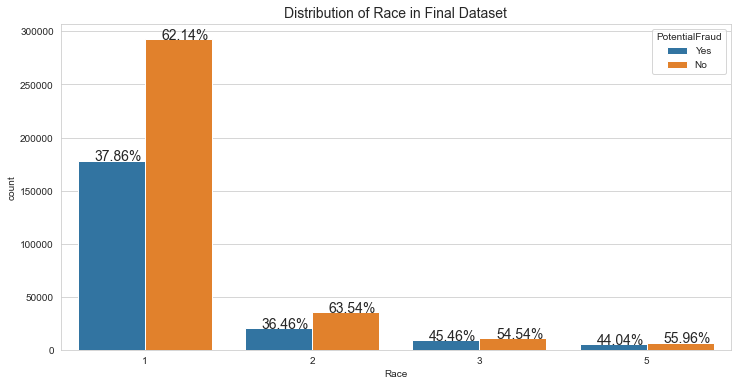

In [139]:
# Distribution of race in Overall data
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Race',y=None, data=Final_Dataset_Train, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = Final_Dataset_Train['Race'].value_counts().index)
plt.title('Distribution of Race in Final Dataset', size = 14)
percentage_with_hue(ax, Final_Dataset_Train.Race, 4,2,-0.1,200, 14)

In [140]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_df['ProcedureCode'] = pd.concat([Final_Dataset_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [141]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df['DiagnosisCode'] = pd.concat([Final_Dataset_Train["ClmDiagnosisCode_1"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_2"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_3"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_4"],
                                           Final_Dataset_Train["ClmDiagnosisCode_5"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_6"],
                                           Final_Dataset_Train["ClmDiagnosisCode_7"],
                                           Final_Dataset_Train["ClmDiagnosisCode_8"],
                                           Final_Dataset_Train["ClmDiagnosisCode_9"],
                                           Final_Dataset_Train["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [142]:
Final_Dataset_Train.columns[Final_Dataset_Train.isnull().any()].tolist()
#dealing with NuLL values occuring in the dataset

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Hospitalization_Duration',
 'ExtraClaimDays',
 'Admission_Year',
 'Admission_Month',
 'Discharge_Year',
 'Discharge_Month',
 'DOD']

In [143]:
# Let us fill all the missing values with zero
Final_Dataset_Train = Final_Dataset_Train.fillna(0).copy()
Final_Dataset_Test = Final_Dataset_Test.fillna(0).copy()

In [144]:
Final_Dataset_Train.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month,Inpatient_or_Outpatient,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Birth_Year,Birth_Month,Patient_Age,isDead
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.0,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.294788,246.214002,40.385994,7.32746,0.860411,0.084959,0.0,0.483269,2.727940,0.000066,2008.995154,6.354835,2008.999998,6.354246,145.664593,0.458715,145.665825,0.457675,0.072507,0.421162,1.255011,0.196786,25.446969,378.588195,11.931472,11.93877,0.401868,0.590427,0.412002,0.151385,0.312930,0.434807,0.705395,0.759265,0.317647,0.311171,0.101720,5227.971466,568.756807,2278.225348,649.698745,4.695402,1935.723180,6.533891,73.769770,0.007400
std,3821.534891,273.814128,1334.040239,452.543763,199.76420,66.118097,23.631448,0.0,2.300583,4.904984,0.012907,0.069443,3.411155,0.001338,3.408987,520.979851,1.883697,520.984258,1.878974,0.259325,0.493746,0.717437,0.397569,15.192784,265.215531,0.889712,0.78590,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811,2.484088,13.011761,3.455427,13.022524,0.085707
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,2008.000000,1.000000,2008.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8000.000000,0.000000,-70.000000,0.000000,0.000000,1909.000000,1.000000,26.000000,0.000000
25%,40.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,2009.000000,3.000000,2009.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,11.000000,150.000000,12.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.000000,120.000000,3.000000,1927.000000,4.000000,68.000000,0.000000
50%,80.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,2009.000000,6.000000,2009.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000,350.000000,12.000000,12.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1170.000000,340.000000,5.000000,1935.000000,7.000000,75.000000,0.000000
75%,300.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,2009.000000,9.000000,2009.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,38.000000,570.000000,12.000000,12.000

In [145]:
# # NOW WE WILL START WITH FEATURE ENGINEERING:-

# #PLAUSIBLE REASONS FOR FRAUD :-

# 1. Fraud can be at a provider level, as provider fills and submits the claim so I will group by provider and take mean of
# reimbursed, deducted, etc. If average claim amount or claim period is high for a  provider that is suspecious.
# 2. Beneficiaries also associated with fraudulent activity. So, group by the dataframe by Beneficiary Id and take mean. 
# If average claim amount is high for a beneficiary then rhis is suspicious.
# 3. Physicians also associate with fraud so groupBy() physicians also

In [146]:
def create_feature_using_groupby(Train_df, Test_df, gruopby_col, operation_col,operation):
    '''
    This function groupby the 'Train_df' and 'Test_df' dataframe by 'gruopby_col' and performs 'operation' on 'operation_col'
    '''
    
    for col in operation_col:
        # create new column name for the dataframe
        new_col_name = 'Per'+''.join(gruopby_col)+'_'+operation+'_'+col
        print(new_col_name)
        Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
        Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
    return Train_df, Test_df

In [147]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test = create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], columns, 'mean')

PerProvider_mean_InscClaimAmtReimbursed
PerProvider_mean_DeductibleAmtPaid
PerProvider_mean_IPAnnualReimbursementAmt
PerProvider_mean_IPAnnualDeductibleAmt
PerProvider_mean_OPAnnualReimbursementAmt
PerProvider_mean_OPAnnualDeductibleAmt
PerProvider_mean_Patient_Age
PerProvider_mean_NoOfMonths_PartACov
PerProvider_mean_NoOfMonths_PartBCov
PerProvider_mean_Hospitalization_Duration
PerProvider_mean_Claim_Period
PerProvider_mean_Patient_Risk_Score


In [148]:
Final_Dataset_Train['Provider'].value_counts()

PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3436
            ... 
PRV55427       1
PRV56369       1
PRV55400       1
PRV57752       1
PRV52785       1
Name: Provider, Length: 5410, dtype: int64

In [149]:
Final_Dataset_Train['PerProvider_mean_InscClaimAmtReimbursed'].value_counts()

281.782767      8240
275.079131      4739
288.436094      4444
282.750836      3588
307.802678      3436
                ... 
23000.000000       1
36000.000000       1
1900.000000        1
26000.000000       1
27000.000000       1
Name: PerProvider_mean_InscClaimAmtReimbursed, Length: 4502, dtype: int64

In [150]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['BeneID'], columns, 'mean')

PerBeneID_mean_InscClaimAmtReimbursed
PerBeneID_mean_DeductibleAmtPaid
PerBeneID_mean_IPAnnualReimbursementAmt
PerBeneID_mean_IPAnnualDeductibleAmt
PerBeneID_mean_OPAnnualReimbursementAmt
PerBeneID_mean_OPAnnualDeductibleAmt
PerBeneID_mean_Patient_Age
PerBeneID_mean_Hospitalization_Duration
PerBeneID_mean_Claim_Period
PerBeneID_mean_Patient_Risk_Score


In [151]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['AttendingPhysician'], columns, 'mean')

PerAttendingPhysician_mean_InscClaimAmtReimbursed
PerAttendingPhysician_mean_DeductibleAmtPaid
PerAttendingPhysician_mean_IPAnnualReimbursementAmt
PerAttendingPhysician_mean_IPAnnualDeductibleAmt
PerAttendingPhysician_mean_OPAnnualReimbursementAmt
PerAttendingPhysician_mean_OPAnnualDeductibleAmt
PerAttendingPhysician_mean_Patient_Age
PerAttendingPhysician_mean_Hospitalization_Duration
PerAttendingPhysician_mean_Claim_Period
PerAttendingPhysician_mean_Patient_Risk_Score


In [152]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OperatingPhysician'], columns, 'mean')

PerOperatingPhysician_mean_InscClaimAmtReimbursed
PerOperatingPhysician_mean_DeductibleAmtPaid
PerOperatingPhysician_mean_IPAnnualReimbursementAmt
PerOperatingPhysician_mean_IPAnnualDeductibleAmt
PerOperatingPhysician_mean_OPAnnualReimbursementAmt
PerOperatingPhysician_mean_OPAnnualDeductibleAmt
PerOperatingPhysician_mean_Patient_Age
PerOperatingPhysician_mean_Hospitalization_Duration
PerOperatingPhysician_mean_Claim_Period
PerOperatingPhysician_mean_Patient_Risk_Score


In [153]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OtherPhysician'], columns, 'mean')

PerOtherPhysician_mean_InscClaimAmtReimbursed
PerOtherPhysician_mean_DeductibleAmtPaid
PerOtherPhysician_mean_IPAnnualReimbursementAmt
PerOtherPhysician_mean_IPAnnualDeductibleAmt
PerOtherPhysician_mean_OPAnnualReimbursementAmt
PerOtherPhysician_mean_OPAnnualDeductibleAmt
PerOtherPhysician_mean_Patient_Age
PerOtherPhysician_mean_Hospitalization_Duration
PerOtherPhysician_mean_Claim_Period
PerOtherPhysician_mean_Patient_Risk_Score


In [154]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['DiagnosisGroupCode'], columns, 'mean')

PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed
PerDiagnosisGroupCode_mean_DeductibleAmtPaid
PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_Patient_Age
PerDiagnosisGroupCode_mean_Hospitalization_Duration
PerDiagnosisGroupCode_mean_Claim_Period
PerDiagnosisGroupCode_mean_Patient_Risk_Score


In [155]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmAdmitDiagnosisCode'], columns, 'mean')

PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed
PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid
PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_Patient_Age
PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration
PerClmAdmitDiagnosisCode_mean_Claim_Period
PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score


In [156]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_1'], columns, 'mean')

PerClmProcedureCode_1_mean_InscClaimAmtReimbursed
PerClmProcedureCode_1_mean_DeductibleAmtPaid
PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_Patient_Age
PerClmProcedureCode_1_mean_Hospitalization_Duration
PerClmProcedureCode_1_mean_Claim_Period
PerClmProcedureCode_1_mean_Patient_Risk_Score


In [157]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_2'], columns, 'mean')

PerClmProcedureCode_2_mean_InscClaimAmtReimbursed
PerClmProcedureCode_2_mean_DeductibleAmtPaid
PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_Patient_Age
PerClmProcedureCode_2_mean_Hospitalization_Duration
PerClmProcedureCode_2_mean_Claim_Period
PerClmProcedureCode_2_mean_Patient_Risk_Score


In [158]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_3'], columns, 'mean')

PerClmProcedureCode_3_mean_InscClaimAmtReimbursed
PerClmProcedureCode_3_mean_DeductibleAmtPaid
PerClmProcedureCode_3_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_Patient_Age
PerClmProcedureCode_3_mean_Hospitalization_Duration
PerClmProcedureCode_3_mean_Claim_Period
PerClmProcedureCode_3_mean_Patient_Risk_Score


In [159]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_4'], columns, 'mean')

PerClmProcedureCode_4_mean_InscClaimAmtReimbursed
PerClmProcedureCode_4_mean_DeductibleAmtPaid
PerClmProcedureCode_4_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_Patient_Age
PerClmProcedureCode_4_mean_Hospitalization_Duration
PerClmProcedureCode_4_mean_Claim_Period
PerClmProcedureCode_4_mean_Patient_Risk_Score


In [160]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_5'], columns, 'mean')

PerClmProcedureCode_5_mean_InscClaimAmtReimbursed
PerClmProcedureCode_5_mean_DeductibleAmtPaid
PerClmProcedureCode_5_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_Patient_Age
PerClmProcedureCode_5_mean_Hospitalization_Duration
PerClmProcedureCode_5_mean_Claim_Period
PerClmProcedureCode_5_mean_Patient_Risk_Score


In [161]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_6'], columns, 'mean')

PerClmProcedureCode_6_mean_InscClaimAmtReimbursed
PerClmProcedureCode_6_mean_DeductibleAmtPaid
PerClmProcedureCode_6_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_6_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_6_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_Patient_Age
PerClmProcedureCode_6_mean_Hospitalization_Duration
PerClmProcedureCode_6_mean_Claim_Period
PerClmProcedureCode_6_mean_Patient_Risk_Score


In [162]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_1'], columns, 'mean')

PerClmDiagnosisCode_1_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_1_mean_DeductibleAmtPaid
PerClmDiagnosisCode_1_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_1_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_1_mean_Patient_Age
PerClmDiagnosisCode_1_mean_Hospitalization_Duration
PerClmDiagnosisCode_1_mean_Claim_Period
PerClmDiagnosisCode_1_mean_Patient_Risk_Score


In [163]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_2'], columns, 'mean')

PerClmDiagnosisCode_2_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_2_mean_DeductibleAmtPaid
PerClmDiagnosisCode_2_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_2_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_2_mean_Patient_Age
PerClmDiagnosisCode_2_mean_Hospitalization_Duration
PerClmDiagnosisCode_2_mean_Claim_Period
PerClmDiagnosisCode_2_mean_Patient_Risk_Score


In [164]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_3'], columns, 'mean')

PerClmDiagnosisCode_3_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_3_mean_DeductibleAmtPaid
PerClmDiagnosisCode_3_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_3_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_3_mean_Patient_Age
PerClmDiagnosisCode_3_mean_Hospitalization_Duration
PerClmDiagnosisCode_3_mean_Claim_Period
PerClmDiagnosisCode_3_mean_Patient_Risk_Score


In [165]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_4'], columns, 'mean')

PerClmDiagnosisCode_4_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_4_mean_DeductibleAmtPaid
PerClmDiagnosisCode_4_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_4_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_4_mean_Patient_Age
PerClmDiagnosisCode_4_mean_Hospitalization_Duration
PerClmDiagnosisCode_4_mean_Claim_Period
PerClmDiagnosisCode_4_mean_Patient_Risk_Score


In [166]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_5'], columns, 'mean')

PerClmDiagnosisCode_5_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_5_mean_DeductibleAmtPaid
PerClmDiagnosisCode_5_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_5_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_5_mean_Patient_Age
PerClmDiagnosisCode_5_mean_Hospitalization_Duration
PerClmDiagnosisCode_5_mean_Claim_Period
PerClmDiagnosisCode_5_mean_Patient_Risk_Score


In [167]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_6'], columns, 'mean')

PerClmDiagnosisCode_6_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_6_mean_DeductibleAmtPaid
PerClmDiagnosisCode_6_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_6_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_6_mean_Patient_Age
PerClmDiagnosisCode_6_mean_Hospitalization_Duration
PerClmDiagnosisCode_6_mean_Claim_Period
PerClmDiagnosisCode_6_mean_Patient_Risk_Score


In [168]:
# Count the claims per provider
Final_Dataset_Train, Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], ['ClaimID'], 'count')

PerProvider_count_ClaimID


In [169]:
columns = ['ClaimID']
grp_by_cols = ['BeneID', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmProcedureCode_1',
               'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
               'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'DiagnosisGroupCode']
for ele in grp_by_cols:
    lst = ['Provider', ele]
    Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, lst, columns, 'count')

PerProviderBeneID_count_ClaimID
PerProviderAttendingPhysician_count_ClaimID
PerProviderOtherPhysician_count_ClaimID
PerProviderOperatingPhysician_count_ClaimID
PerProviderClmAdmitDiagnosisCode_count_ClaimID
PerProviderClmProcedureCode_1_count_ClaimID
PerProviderClmProcedureCode_2_count_ClaimID
PerProviderClmProcedureCode_3_count_ClaimID
PerProviderClmProcedureCode_4_count_ClaimID
PerProviderClmProcedureCode_5_count_ClaimID
PerProviderClmDiagnosisCode_1_count_ClaimID
PerProviderClmDiagnosisCode_2_count_ClaimID
PerProviderClmDiagnosisCode_3_count_ClaimID
PerProviderClmDiagnosisCode_4_count_ClaimID
PerProviderClmDiagnosisCode_5_count_ClaimID
PerProviderClmDiagnosisCode_6_count_ClaimID
PerProviderDiagnosisGroupCode_count_ClaimID


In [170]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt',
       ...
       'PerProviderClmProcedureCode_3_count_ClaimID',
       'PerProviderClmProcedureCode_4_count_ClaimID',
       'PerProviderClmProcedureCode_5_count_ClaimID',
       'PerProviderClmDiagnosisCode_1_count_ClaimID',
       'PerProviderClmDiagnosisCode_2_count_ClaimID',
       'PerProviderClmDiagnosisCode_3_count_ClaimID',
       'PerProviderClmDiagnosisCode_4_count_ClaimID',
       'PerProviderClmDiagnosisCode_5_count_ClaimID',
       'PerProviderClmDiagnosisCode_6_count_ClaimID',
       'PerProviderDiagnosisGroupCode_count_ClaimID'],
      dtype='object', length=282)

In [171]:
Final_Dataset_Train.shape

(558211, 282)

In [172]:
Final_Dataset_Test.shape

(135392, 281)

In [173]:
for col in Final_Dataset_Train.columns:
    if col not in Final_Dataset_Test.columns:
        print(col)

PotentialFraud


In [174]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','ClaimStart_Year', 'ClaimStart_Year', 'ClaimStart_Month',
                'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month',
                'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','Birth_Year', 'Birth_Month','State', 'County']

Final_Dataset_Train_FE=Final_Dataset_Train.drop(columns=remove_columns, axis=1)
Final_Dataset_Test_FE=Final_Dataset_Test.drop(columns=remove_columns, axis=1)

In [175]:
Final_Dataset_Train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month,Inpatient_or_Outpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Birth_Year,Birth_Month,Patient_Age,isDead,PotentialFraud,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPa

In [176]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt',
       ...
       'PerProviderClmProcedureCode_3_count_ClaimID',
       'PerProviderClmProcedureCode_4_count_ClaimID',
       'PerProviderClmProcedureCode_5_count_ClaimID',
       'PerProviderClmDiagnosisCode_1_count_ClaimID',
       'PerProviderClmDiagnosisCode_2_count_ClaimID',
       'PerProviderClmDiagnosisCode_3_count_ClaimID',
       'PerProviderClmDiagnosisCode_4_count_ClaimID',
       'PerProviderClmDiagnosisCode_5_count_ClaimID',
       'PerProviderClmDiagnosisCode_6_count_ClaimID',
       'PerProviderDiagnosisGroupCode_count_ClaimID'],
      dtype='object', length=282)

In [177]:
# Convert type of Gender and Race to categorical
Final_Dataset_Train_FE.Gender=Final_Dataset_Train_FE.Gender.astype('category')
Final_Dataset_Test_FE.Gender=Final_Dataset_Test_FE.Gender.astype('category')

Final_Dataset_Train_FE.Race=Final_Dataset_Train_FE.Race.astype('category')
Final_Dataset_Test_FE.Race=Final_Dataset_Test_FE.Race.astype('category')

In [178]:
Final_Dataset_Train_FE.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,PotentialFraud,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_O

In [179]:
# One hot encoding for gender and Race
Final_Dataset_Train_FE=pd.get_dummies(Final_Dataset_Train_FE,columns=['Gender','Race'])
Final_Dataset_Test_FE=pd.get_dummies(Final_Dataset_Test_FE,columns=['Gender','Race'])

In [189]:
Final_Dataset_Train_FE.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,PotentialFraud,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimb

In [181]:
Final_Dataset_Train = Final_Dataset_Train_FE
Final_Dataset_Test = Final_Dataset_Test_FE

In [182]:
Final_Dataset_Train.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Final_Dataset_Train.PotentialFraud=Final_Dataset_Train.PotentialFraud.astype('int64')

In [183]:
# create new feature total reimbursement amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['OPAnnualDeductibleAmt']

Final_Dataset_Test['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['OPAnnualDeductibleAmt']

In [184]:
Final_Dataset_Train.shape

(558211, 247)

In [185]:
Final_Dataset_Train.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,PotentialFraud,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimb

In [186]:
Final_Dataset_Train.to_csv('Final_Train.csv')

In [187]:
Final_Dataset_Train.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,PotentialFraud,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimbursementA

In [188]:
Final_Dataset_Train.groupby(['Inpatient_or_Outpatient','PotentialFraud'])['PotentialFraud'].count()

Inpatient_or_Outpatient  PotentialFraud
0                        0                 328343
                         1                 189394
1                        0                  17072
                         1                  23402
Name: PotentialFraud, dtype: int64

In [190]:
Final_Dataset_Provider_Train = Final_Dataset_Train_FE.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Final_Dataset_Provider_Test  = Final_Dataset_Test_FE.groupby(['Provider'],as_index=False).agg('sum')

In [191]:
Final_Dataset_Provider_Train.shape


(5410, 247)

In [192]:
Final_Dataset_Provider_Test.shape


(1353, 246)

In [193]:
Final_Dataset_Provider_Train.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimb

In [194]:
Final_Dataset_Provider_Train.to_csv('Train_Provider.csv')
Final_Dataset_Provider_Test.to_csv('Test_Provider.csv')